<h3><div align="left"> Université Paris Cité </div> <div align="right"> Année 2023-2024</div></h3>
<h3><div align="center">Master 2 - MMA</div></h3>
<h3><div align="center">Olivier BOUËT-WILLAUMEZ</div></h3>
<h3><div align="center">Optimisation</div></h3>
<h1><div align="center">TP 1 - Compressed sensing et algorithmes proximaux</div></h1>

L'objectif de ce TP est de trouver une estimation $\hat{u}$ d'une inconnue $u$ à partir de la donnée $d=Au+b$, où $A$ est une application linéaire connue et $b$ est un bruit blanc gaussien.

### 1. *Cas d'une bijection, sans bruit.*

On suppose que 

$$ A = \begin{pmatrix}10&7&8&7\\7&5&6&5\\8&6&10&9\\7&5&9&10\end{pmatrix}, \ u = \begin{pmatrix}1\\0\\0\\0\end{pmatrix}, \text{et}\ b=\begin{pmatrix}0\\0\\0\\0\end{pmatrix} $$

_**<u>Question:</u>**_ Calculer la donnée $d$ et lui appliquer la matrice inverse $A^{-1}$ pour retrouver l'inconnue $u$.

In [1]:
import numpy as np

*Définition des données:*

In [2]:
A = np.array([[10,7,8,7],[7,5,6,5],[8,6,10,9],[7,5,9,10]])
u = np.reshape(np.array([1,0,0,0]),(4,1))
b = np.reshape(np.array([0,0,0,0]),(4,1))
inv_A = np.linalg.inv(A)

*Calcul de la donnée $d$ et de* `u_retrouve`:

In [3]:
d = A@u + b
u_retrouve = inv_A@d
print(u_retrouve)

[[ 1.00000000e+00]
 [-1.56319402e-13]
 [ 3.90798505e-14]
 [-8.88178420e-15]]


### 2. *Cas d'une bijection, avec bruit.*

On suppose maintenant que $$b=\begin{pmatrix}0.1,-0.1,0.1,-0.1\end{pmatrix}^T$$ 

**(a)** _**<u>Question:</u>**_ Calculer la donnée $d$ et lui appliquer la matrice inverse $A^{-1}$. Commenter le résultat obtenu.

*Définition des données:*

In [4]:
b = np.reshape(np.array([0.1,-0.1,0.1,-0.1]),(4,1))

*Calcul de la donnée $d$ et de* `u_retrouve`:

In [5]:
d=A@u+b
u_retrouve = inv_A@d
print(u_retrouve)

[[  9.2]
 [-13.6]
 [  3.5]
 [ -2.1]]


<u>Commentaire:</u> En raison du léger bruit $b$, on constate que $A^{-1}d$ est très loin de $u$. Cela s'explique par le fait que $A$ n'est pas bien conditionnée comme nous le montre la cellule de code suivante.

In [6]:
cond_A=max(np.abs(np.linalg.eigvals(A)))/min(np.abs(np.linalg.eigvals(A)))
print("Le conditionnement de A vaut: "+str(cond_A))

Le conditionnement de A vaut: 2984.092701676514


**(b)** Afin d'éviter l'explosion du bruit, on se propose d'utiliser une régularisation de *Tikhonov* ou, en d'autres termes, de prendre comme solution du problème le minimiseur de la fonction 

$$f:x \mapsto \frac{1}{2}||Ax-d||^2_2+ \frac{\lambda}{2}||x||^2_2$$

_**<u>Question:</u>**_ Montrer que le minimiseur $\hat{u}_{\lambda}$ dépend linéairement de $d$ et déterminer numériquement  $\hat{u}_{\lambda}$ pour plusieurs valeurs de $\lambda$. Commenter le résultat obtenu.

Le minimiseur $\hat{u}_{\lambda}$ vérifie $\nabla f(\hat{u}_{\lambda})=0$.

Calculons donc le gradient de $f$ en tout point $x$. On a directement que:

$$\nabla f (x) = A^T(Ax-d)+\lambda x$$

On a alors que:
$$\begin{align}
\nabla f(\hat{u}_{\lambda})=0 & \iff A^T(Ax-d)+\lambda \hat{u}_{\lambda} = 0 \\
                             & \iff \hat{u}_{\lambda} = (A^TA+\lambda Id)^{-1}A^T d\\
\end{align}$$       
avec bien entendu la condition que $(A^TA+\lambda Id)$ soit inversible.

<u>Commentaire:</u> Cela prouve dans un premier temps que le minimiseur $\hat{u}_{\lambda}$ dépend linéairement de $d$.

Déterminons maintenant numériquement $\hat{u}_{\lambda}$ pour plusieurs valeurs de $\lambda$, pour cela, on définit tout d'abord la solution $\hat{u}_{\lambda}$ via la fonction `u_chap`.

In [6]:
def u_chap(lambd):
    return np.linalg.inv(A.T@A+lambd*np.eye(4))@(A.T@d)

On peut alors déterminer un $\lambda$ "optimal" en calculant l'erreur ||$\hat{u}_{\lambda}-u||_2$ pour différentes valeurs de $\lambda$ ( $\lambda = 0$ étant exclu car l'écart explose pour cette valeur comme nous l'avons montré précédemment ):

In [7]:
lambd_vect = np.arange(0.1,1,0.1)
erreur_values = []
for lambd in lambd_vect:
    erreur = np.linalg.norm(u_chap(lambd)-u)
    erreur_values.append(erreur)

In [8]:
import matplotlib.pyplot as plt

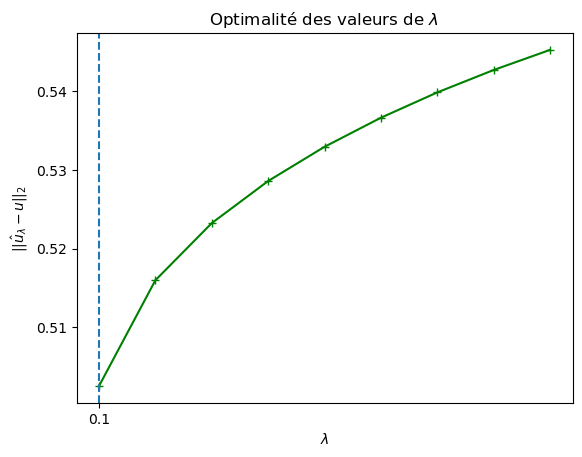

In [9]:
plt.plot(lambd_vect,erreur_values,marker="+",color="green")
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$||\hat{u}_{\lambda}-u||_2$')
plt.title("Optimalité des valeurs de "+r'$\lambda$')
plt.axvline(x=lambd_vect[erreur_values.index(min(erreur_values))], linewidth=1.5, linestyle="dashed")
plt.xticks([lambd_vect[erreur_values.index(min(erreur_values))]])
plt.show()

<u>Commentaire:</u> On remarque que la valeur optimale de $\lambda$ est atteinte en lambda petit mais non nul.

**(c)** On sait cependant que l'inconnue $u$ possède plusieurs composantes nulles. Il conviendrait donc d'utiliser une régularisation qui favorise les solutions parcimonieuses comme la norme $||\cdot||_1$. On pose alors la fonction 

$$f:x\mapsto \frac{1}{2}||Ax-d||_2^2 +\lambda ||x||_1$$

Afin de faciliter la minimisation de $f$, on va approcher $||\cdot||_1$ par sa régularisée de *Moreau-Yosida* qui est différentiable.

$$f_{\varepsilon}:x\mapsto \frac{1}{2}||Ax-d||_2^2 +\lambda \sum\limits_{k=1}^{4}g_{\varepsilon}(x_k)$$

où $$g_{\varepsilon}(t) = \left \{
\begin{array}{l @{=} l}
    \frac{t^2}{2\varepsilon}&,\ \text{si} \ |t| \leq \varepsilon \\
    |t| - \frac{\varepsilon}{2}&, \ \text{si} \ |t| > \varepsilon
\end{array}
\right. $$


_**<u>Question:</u>**_ Calculer le gradient de $f_{\varepsilon}$ et minimiser la fonction à l'aide d'une descente de gradient à pas fixe, pour plusieurs valeurs des paramètres $\lambda$ et $\varepsilon$.

Le gradient de la somme de deux fonctions étant la somme des gradients des deux fonctions, on a que:

$$\nabla f_{\varepsilon}(x)=A^T(Ax-d)+\lambda \begin{pmatrix} g_{\varepsilon}'(x_{1}),g_{\varepsilon}'(x_{2}),g_{\varepsilon}'(x_{3}),g_{\varepsilon}'(x_{4})\end{pmatrix}^T$$ 

En ce qui concerne le pas de cette descente de gradient, on pourra choisir un pas fixe $\rho$ = $\frac{1}{\rho_1 + \rho_2} $, avec $\rho_1 = max\big{\{}|\mu| \ \text{tq}\ \mu \ \text{est une vp de}\ A^TA \big{\}}$, et $\rho_2= \frac{\lambda}{\varepsilon}$. C'est une constante de *Lipschitz* du gradient.

Définissons désormais les fonctions annexes à la descente de gradient, telles que celles qui calculent les gradients des fonctions `grad_g_epsilon`, `grad_f_epsilon`, et celle du pas `pas`.

In [11]:
def grad_g_epsilon(epsilon,t):
    return (t/epsilon)*(np.abs(t)<=epsilon)+1*(t>epsilon)-1*(t<-epsilon)

def grad_f_epsilon(lambd,epsilon,t):
    grad_f_bloc1=(A.T@A)@t-A.T@d
    return grad_f_bloc1+lambd*grad_g_epsilon(epsilon,t)

In [12]:
rho1=np.max(np.abs(np.linalg.eigvals(A.T@A)))
def pas(lambd,epsilon):
    return 1/(rho1+(lambd/epsilon))

Implémentons maintenant la descente de gradient `descente_de_gradient` en utilisant ce que l'on a fait précédemment.

In [13]:
def descente_de_gradient(t0,lambd,epsilon,Niter):
    t=t0
    for i in range(Niter):
        t = t - pas(lambd,epsilon)*grad_f_epsilon(lambd,epsilon,t)
    return t

On peut observer graphiquement la convergence de l'algorithme suivant le nombre d'itérations, définissons pour cela deux fonctions d'affichage `printer_large`( utilisée avec une discrétisation large pour les cas où l'on a besoin de beaucoup d'itérations pour converger ) et `printer_leger` ( dans le cas contraitre ) qui nous seront bien utiles par la suite.

In [14]:
def printer_large(algorithme,t0,lambd,epsilon,Niter):
    N_values = np.arange(50,Niter,1000,dtype=int)
    erreur_vect = []
    
    for n in N_values:
        erreur = np.linalg.norm(algorithme(t0,lambd,epsilon,n)-u)    
        erreur_vect.append(erreur)
    
    plt.xlabel("Nombre d'itérations")
    plt.ylabel(r'$||algo(x)-u||_2$')
    plt.grid(True)
    plt.plot(N_values,erreur_vect,label=r'$\lambda , \varepsilon =$'+str(lambd)+","+str(epsilon))

In [15]:
def printer_leger(algorithme,t0,lambd,epsilon,Niter):
    N_values = np.arange(50,Niter,10,dtype=int)
    erreur_vect = []
    
    for n in N_values:
        erreur = np.linalg.norm(algorithme(t0,lambd,epsilon,n)-u)    
        erreur_vect.append(erreur)
    
    plt.xlabel("Nombre d'itérations")
    plt.ylabel(r'$||algo(x)-u||_2$')
    plt.grid(True)
    plt.plot(N_values,erreur_vect,label=r'$\lambda , \varepsilon =$'+str(lambd)+","+str(epsilon))

In [16]:
t0 = np.zeros((4,1))
lambd_vect=[0.1,10,0.3]
epsilon_vect=[0.01,0.001,0.001]
Niter=20000

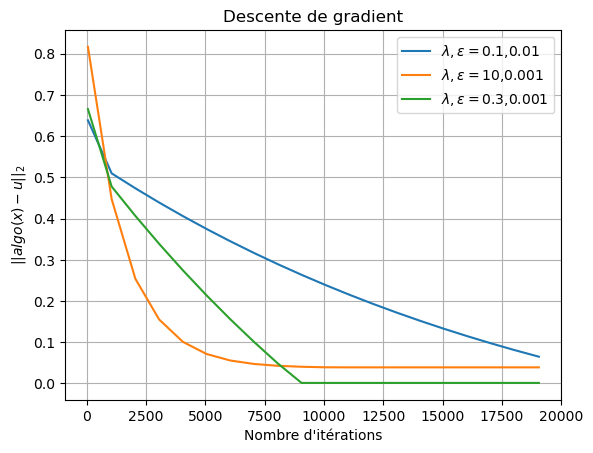

In [17]:
for i in range(3):
    printer_large(descente_de_gradient,t0,lambd_vect[i],epsilon_vect[i],Niter)
plt.legend()
plt.title("Descente de gradient")
plt.show()

<u>Commentaire:</u> On remarque que le choix de $\lambda$ et $\varepsilon$ est important pour garantir la convergence de l'algorithme.

**(d)** Utiliser l'algorithme accéléré de *Nesterov*.

Définissons pour cela la fonction `Nesterov`:

In [18]:
def Nesterov(t0,lambd,epsilon,Niter):
    t = t0
    y = t0
    saut = 1
    for n in range(Niter):
        t_1 = y - pas(lambd,epsilon)*grad_f_epsilon(lambd,epsilon,y)
        saut_1 = (1 +np.sqrt(1+4*saut**2))/2
        y = t_1 + ((saut-1)/saut_1)*(t_1-t)
        t = t_1
        saut = saut_1
    return t

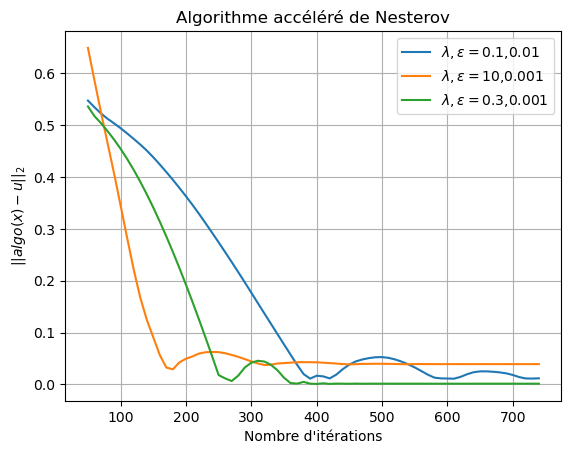

In [19]:
Niter=750
for i in range(3):
    printer_leger(Nesterov,t0,lambd_vect[i],epsilon_vect[i],Niter)
plt.legend()
plt.title("Algorithme accéléré de Nesterov")
plt.show()

<u>Commentaire:</u> La descente de gradient accélérée de Nesterov est énormément plus rapide, l'algorithme converge en seulement $400$ itérations environ, là où l'algorithme de descente de gradient classique met plus de $10000$ itérations à converger dans les pires cas. Sur l'algorithme de Nesterov on constate à chaque fois un petit rebond avant la convergence finale.

**(e)** Calculer le sous-différentiel de la fonction $f$ non-régularisée

On rappelle que la fonction $f$ non-régularisée est de la forme: 

$$f:x\mapsto \frac{1}{2}||Ax-d||_2^2 +\lambda ||x||_1$$

On définit dans un premier temps: $f_1:x\mapsto \frac{1}{2}||Ax-d||_2^2 $, $f_1$ étant différentiable, on a alors que $\partial f_1(x) = \{\nabla f_1(x) \} =\{ A^T(Ax-d)\}$.

Dans un second temps, on note $f_2:x\mapsto \lambda ||x||_1 = \lambda \sum\limits_{k=1}^{4}|x_k|$.

On a que 
$$\begin{align}
g \in \partial f_2(x) & \iff \forall y \in R^d, \lambda \sum\limits_{k=1}^{4}|y_k| \geq \sum\limits_{k=1}^{4}\lambda |x_k| +g_k(y_k-x_k) \\
                      & \iff \forall y \in R^d,\forall k \in \{1,\dots,4\},\lambda|y_k| \geq \lambda|x_k| +g_k(y_k-x_k) \\
                      & \iff \forall k \in \{1,\dots,4\}, g_k \in \lambda \text{sign}(x_k) \\
                      & \iff g \in \lambda(\text{sign}(x_k))_{k\in 1 \dots 4}
\end{align}$$

On a de ce fait que: 
$$\partial f:x\mapsto \partial f_1(x) + \partial f_2(x) = \{A^T(Ax-d)\} + \lambda(\text{sign}(x_k))_{k\in 1 \dots 4}$$

Car nous pouvons trouver sans problème un point $\tilde{x} \in \text{dom}(f_1) \cap \text{dom}(f_2)$ en lequel $f_1$ ou $f_2$ est continue, par exemple $\tilde{x}=0$.

**(f)** Minimiser $f$ par une descente de sous-gradient.

Pour cela, implémentons d'abord le sous-différentiel de $f$.

In [20]:
def sous_differentiel(lambd,t):
    return A.T@A@t-A.T@d+lambd*(t>=0)-lambd*(t<0)

Codons maintenant la descente de sous-gradient `descente_de_sous_gradient`. À savoir que le pas de la descente de sous-gradient est choisi comme étant une suite $(\tau_n)_{n\in N}$ qui vérifie les conditions du théorème de *Polyak*.

In [21]:
def descente_de_sous_gradient(t0,lambd,epsilon,Niter):
    t = t0
    for n in range(Niter):
        tau_n = 1/(n+1)
        t = t - tau_n*sous_differentiel(lambd,t)/np.linalg.norm(sous_differentiel(lambd,t))
    return t

On peut observer graphiquement la convergence de l'algorithme suivant le nombre d'itérations.

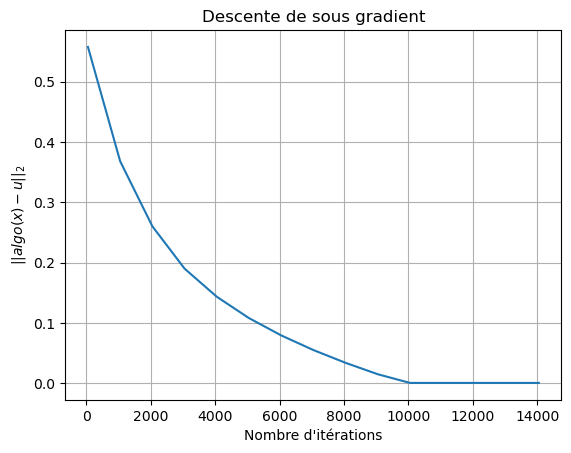

In [22]:
Niter=15000
lambd=0.3
printer_large(descente_de_sous_gradient,t0,lambd,0,Niter)
plt.title("Descente de sous gradient")
plt.show()

**(g)** Calculer l'opérateur proximal de la régularisation $\lambda ||\cdot||_1$. Pourquoi un algorithme explicite-implicite est-il bien adapté pour minimiser $f$ ?

Soit $f:x \mapsto \lambda ||\cdot||_1 $. On a vu en cours et plus particulièrement en TD2 (Exercice 5.3) que l'opérateur proximal de $f$ est le seuillage doux. On a alors que:

$$ prox_f(x)_k = \left \{
\begin{array}{l@{=}l}
x_k -\lambda & \text{si} \ x_k>\lambda\\
          0  & \text{si} \ x_k \in [-\lambda,\lambda]\\
x_k +\lambda & \text{si} \ x_k<-\lambda\\
\end{array}\right.$$

Un algorithme explicite-implicite est bien adapté pour minimiser $f$ car $f = f_1 +f_2$ avec $f_1:x \mapsto\frac{1}{2}||Ax-d||_{2}^{2}$ différentiable, de gradient *Lipschitzien*, et $f_2:x\mapsto||x||_1 $ simple.

**(h)** Minimiser $f$ par l'algorithme explicite-implicite.

Implémentons une fonction `seuillage_doux` pour cela.

In [23]:
def seuillage_doux(x,lambd):
    return (x-lambd)*(x>lambd)+(x+lambd)*(x<-lambd)

Définissons maintenant l'algorithme explicite-implicite.

In [24]:
def explicite_implicite(x0,lambd,tau,Niter):
    x = x0
    for n in range(Niter):
        x = seuillage_doux(x-tau*((A.T@A)@x-A.T@d),tau*lambd)
    return x      

On peut observer graphiquement la convergence de l'algorithme suivant le nombre d'itérations.

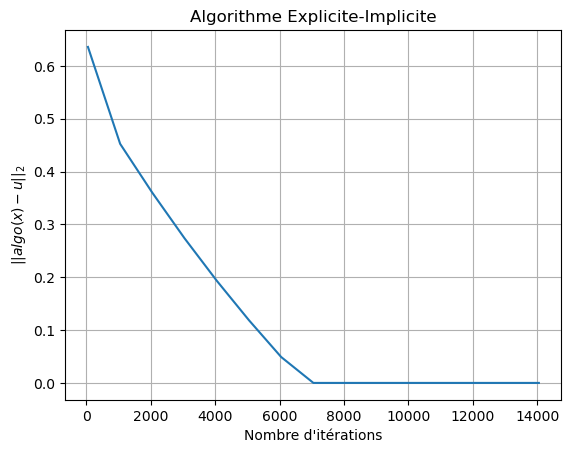

In [25]:
Niter=15000
tau = 1/rho1
lambd=0.3
printer_large(explicite_implicite,t0,lambd,tau,Niter)
plt.title("Algorithme Explicite-Implicite")
plt.show()

**(i)** Minimiser $f$ par l'algorithme FISTA.

Nous implémentons directement l'algorithme `FISTA`.

In [26]:
def FISTA(x0,lambd,tau,Niter):
    x = x0
    y = x0
    t = 1
    for n in range (Niter):
        x_1 = seuillage_doux(y-tau*((A.T@A)@y-A.T@d),tau*lambd)
        t_1 = (1+np.sqrt(1+4*t**2))/2
        y = x_1 + (t-1)*(x_1-x)/t_1
        x = x_1
        t = t_1       
    return x

On peut observer graphiquement la convergence de l'algorithme suivant le nombre d'itérations.

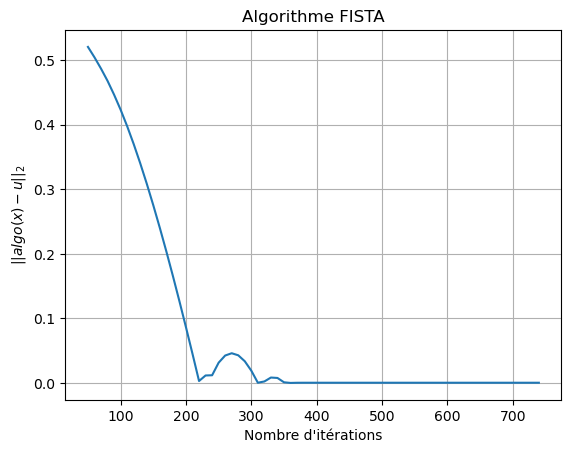

In [27]:
Niter=750
tau = 1/rho1
lambd=0.3
printer_leger(FISTA,t0,lambd,tau,Niter)
plt.title("Algorithme FISTA")
plt.show()

<u>Commentaire:</u> L'algorithme `FISTA` est très satisfaisant, on constate le même petit rebond après la première "convergence" que pour l'algorithme accéléré de Nesterov. L'algorithme converge en seulement $400$ itérations environ encore, contre près de $8000$ pour l'algorithme `explicite_implicite`.

**(j)** Pour un paramètre $\tau > 0$ suffisamment petit, déterminer l'opérateur proximal de la fonction $(x\mapsto \frac{\tau}{2}||Ax-d||^2)$. Pourquoi l'algorithme de *Douglas-Rachford* est-il lui-aussi bien adapté pour minimiser $f$ ?

Nous avons vu en TD que l'opérateur proximal de la fonction $(\Phi:x\mapsto \frac{\tau}{2}||Ax-d||^2)$ est donné par:

$$ prox_{\Phi}(x)= (Id +\tau A^TA)^{-1}(x+\tau A^Td)$$

En effet,
$$\begin{align}
prox_{\Phi}(x) & = \underset{z\in E}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2+\Phi(z)\big{)}, \forall x \in E \\
& = \underset{z\in E}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2+\frac{\tau}{2}||Az-d||^2\big{)}, \forall x \in E 
\end{align}$$

Posons $\Gamma(z)=\frac{1}{2}||z-x||^2+\frac{\tau}{2}||Az-d||^2,\forall x \in E $, c'est une somme de deux fonctions différentiables strictement convexes. Le point $\tilde{z}$ qui annule son gradient est donc la solution de notre problème.

On peut voir facilement que $\nabla \Gamma(z)=z-x +\tau A^T(Az-d)$ et donc on a bien que $\tilde{z}=(Id +\tau A^TA)^{-1}(x+\tau A^Td)$.

L'algorithme de *Douglas-Rachford* est bien adapté pour minimiser $f$ car $f$ est la somme de deux fonctions simples dont on peut calculer l'opérateur proximal.

**(k)** Minimiser $f$ par l'algorithme de *Douglas-Rachford*.

Pour commencer, définissons l'opérateur proximal de $\Phi$ `prox_Phi`.

In [28]:
def prox_Phi(x,tau):
    return np.linalg.inv(np.eye(4)+tau*(A.T@A))@(x+tau*(A.T@d))

Implémentons désormais l'algorithme `Douglas_Rachford`.

In [29]:
def Douglas_Rachford(z0,lambd,tau,Niter):
    z = z0
    x = z0
    y = z0
    for n in range (Niter):
        x = seuillage_doux(z,tau*lambd)
        r = 2*x-z
        y = prox_Phi(r,tau)
        z = z + y -x
        
    return x

On peut observer graphiquement la convergence de l'algorithme suivant le nombre d'itérations.

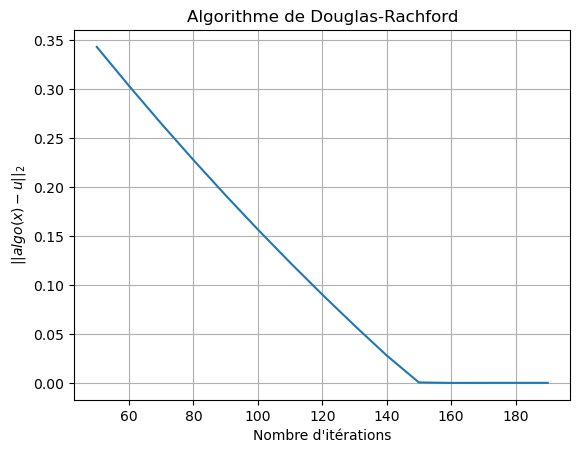

In [30]:
Niter=200
tau = 0.05
lambd=0.3
printer_leger(Douglas_Rachford,t0,lambd,tau,Niter)
plt.title("Algorithme de Douglas-Rachford")
plt.show()

<u>Commentaire:</u> L'algorithme de `Douglas_Rachford` est remarquable dans notre cas. La convergence est extrêmement rapide.

**(l)** Comparer la vitesse de convergence des quatre algorithmes.

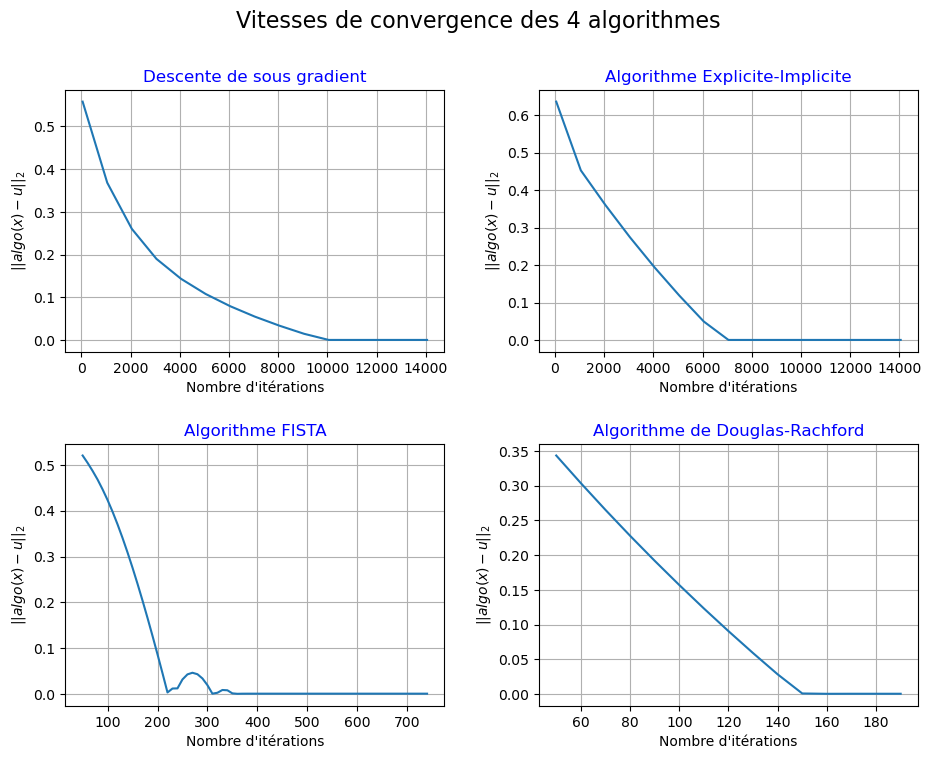

In [31]:
Niter_grand=15000
Niter_petit=750
Niter_minus=200
lambd=0.3
tau_1 = 1/rho1
tau_2 = 0.05

fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(11,8))
plt.subplots_adjust(hspace=0.35,wspace=0.25)
fig.suptitle('Vitesses de convergence des 4 algorithmes', fontsize=16)

plt.subplot(221)
printer_large(descente_de_sous_gradient,t0,lambd,0,Niter_grand)
plt.title("Descente de sous gradient",color="blue")
plt.subplot(222)
printer_large(explicite_implicite,t0,lambd,tau_1,Niter_grand)
plt.title("Algorithme Explicite-Implicite",color="blue")
plt.subplot(223)
printer_leger(FISTA,t0,lambd,tau_1,Niter_petit)
plt.title("Algorithme FISTA",color="blue")
plt.subplot(224)
printer_leger(Douglas_Rachford,t0,lambd,tau_2,Niter_minus)
plt.title("Algorithme de Douglas-Rachford",color="blue")
plt.show()

<u>Commentaire:</u> L'algorithme de `Douglas_Rachford` est le plus rapide de tous, `FISTA` s'en sort bien également. Les deux autres algorithmes sont clairement beaucoup plus lents dans notre cas.

### 3. *Cas d’une application non injective (acquisition comprimée), sans bruit.*

On suppose maintenant que $A$ est la réalisation d'une matrice aléatoire gaussienne $100 \times 200$, centrée, de variance $1$, et $b = 0$. Pour construire $u$, on prend la réalisation d'un vecteur aléatoire gaussien $200 × 1$, centré, de variance $1$, puis on met à zéro tous les coefficients de valeur absolue inférieure à $1,5$.

**(a)** Générer la matrice $A$, l'inconnue $u$ et construire la donnée $d$.

On implémente dans un premier temps les données.

In [32]:
A = np.random.randn(100,200)
u = np.random.randn(200,1)
u[np.abs(u)<=1.5] = 0
d = A@u

On peut afficher $u$ si on le souhaite.

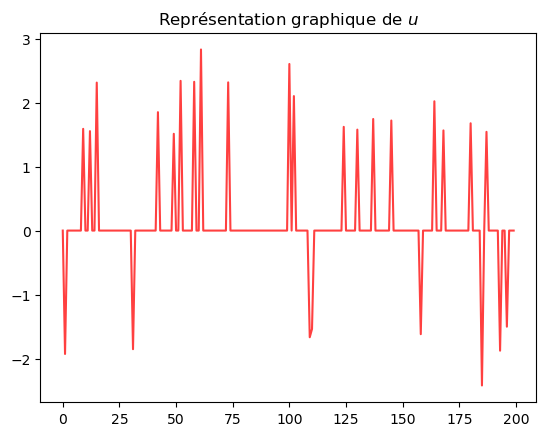

In [33]:
plt.plot(u,color="red",alpha=0.75)
plt.title("Représentation graphique de "+r'$u$')
plt.show()

**(b)** Trouver une estimation $\hat{u}_{\lambda}$ de $u$ à partir de $d$ en minimisant la fonction $f$ (régler le paramètre $\lambda$ afin d'obtenir un signal $\hat{u}_{\lambda}$ parcimonieux).

On va utiliser pour cela l'algorithme `FISTA` qui possède une convergence rapide. On affiche ci dessous $\hat{u}_{\lambda}$ obtenu  en minimisant la fonction $f$ via l'algorithme cité précédemment, ainsi que la vraie solution $u$.

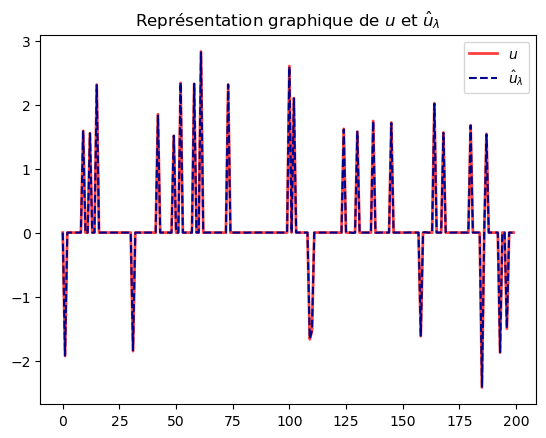

In [36]:
init = np.zeros((200,1))
lambd = 0.3
tau = 1/rho1
Niter = 1000

plt.title("Représentation graphique de "+r'$u$'+" et "+r'$\hat{u}_{\lambda}$')
plt.plot(u,linewidth=2,alpha=0.75,color="red",label=r'$u$')
plt.plot(FISTA(init,lambd,tau,Niter),color="darkblue",linestyle="dashed",label=r'$\hat{u}_{\lambda}$')
plt.legend()
plt.show()

### 4. *Cas d’une application non injective, avec bruit.*

On suppose maintenant que $b$ est la réalisation d'un vecteur aléatoire gaussien, centré, de variance $4$.

**(a)** Générer le vecteur $b$ et construire la donnée $d$.

Implémentons ces données.

In [37]:
b = 2*np.random.randn(100,1)
d = A@u+b

**(b)** Trouver une estimation $\hat{u}_{\lambda}$ de $u$ à partir de $d$ en minimisant la fonction $f$. Que peut-on
observer lorsque $\lambda$ est choisi suffisamment grand pour obtenir un signal parcimonieux.

Comme dans la question précédente, on va utiliser l'algorithme `FISTA`. On affiche ci dessous $\hat{u}_{\lambda}$ obtenu en minimisant la fonction $f$ via l'algorithme cité précédemment, ainsi que la vraie solution $u$.

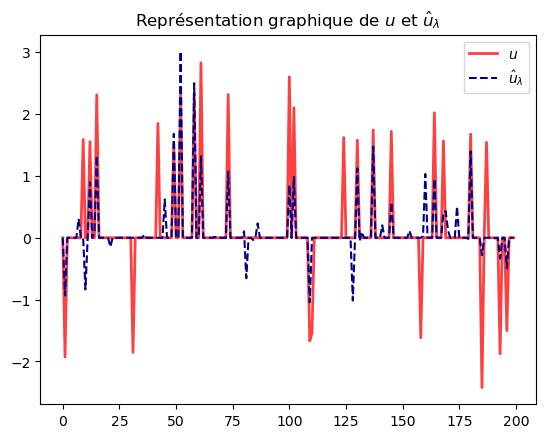

In [39]:
init = np.zeros((200,1))
lambd = 50
tau = 1/rho1
Niter = 1000

plt.title("Représentation graphique de "+r'$u$'+" et "+r'$\hat{u}_{\lambda}$')
plt.plot(u,linewidth=2,alpha=0.75,color="red",label=r'$u$')
plt.plot(FISTA(init,lambd,tau,Niter),color="darkblue",linestyle="dashed",label=r'$\hat{u}_{\lambda}$')
plt.legend()
plt.show()

<u>Commentaire:</u> On constate qu'avec $\lambda$ choisi très grand, $\hat{u}_{\lambda}$ est assez parcimonieux mais l'approximation n'est pas convaincante en raison du bruit ajouté. Par ailleurs, lorsqu'un pic de $u$ parvient à être approché par $\hat{u}_{\lambda}$, son amplitude est petite comparée à l'amplitude du pic original.

**(c)** Dans l'algorithme `explicite_implicite`, changer le seuillage doux en un seuillage dur et relancer l'algorithme en l’initialisant avec l'estimation $\hat{u}_{\lambda}$ obtenue précédemment. Interpréter le résultat obtenu.

Implémentons dans un premier temps le `seuillage_dur` pour ensuite modifier l'algorithme `FISTA`.

In [40]:
def seuillage_dur(x,lambd):
    return x*(np.abs(x)>lambd)

On définit alors la fonction `FISTA_durci` qui utilise le `seuillage_dur` à la place du `seuillage_doux`.

In [41]:
def FISTA_durci(x0,lambd,tau,Niter):
    x = x0
    y = x0
    t = 1
    for n in range (Niter):
        x_1 = seuillage_dur(y-tau*((A.T@A)@y-A.T@d),tau*lambd)
        t_1 = (1+np.sqrt(1+4*t**2))/2
        y = x_1 + (t-1)*(x_1-x)/t_1
        x = x_1
        t = t_1       
    return x

On éxécute l'algorithme en l'initialisant avec l'estimation $\hat{u}_{\lambda}$ obtenue précédemment.

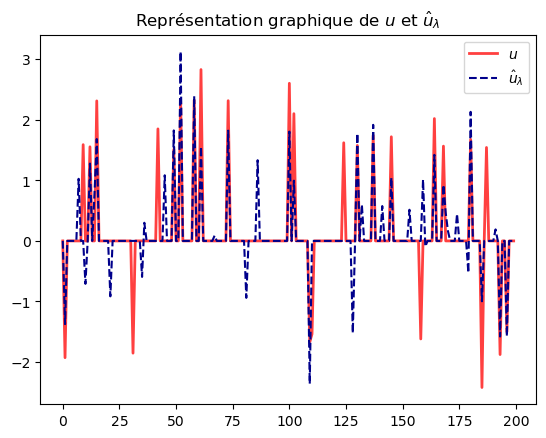

In [42]:
Niter = 1000
lambda1 = 50
lambda2 = 50
tau = 1/rho1
init = FISTA(init,lambda1,tau,Niter)

plt.title("Représentation graphique de "+r'$u$'+" et "+r'$\hat{u}_{\lambda}$')
plt.plot(u,linewidth=2,alpha=0.75,color="red",label=r'$u$')
plt.plot(FISTA_durci(init,lambda2,tau,Niter),color="darkblue",linestyle="dashed",label=r'$\hat{u}_{\lambda}$')
plt.legend()
plt.show()

<u>Commentaire:</u> Avec cette nouvelle méthode, l'amplitude des pics de $\hat{u}_{\lambda}$ est meilleure et l'approximation est donc meilleure, cependant il reste encore un écart conséquent en raison du bruit.

### *5. Cas d’un bruit de basse-fréquence.*

La matrice $A$ est l'identité et on suppose que seuls les $25$ coefficients de *Fourier* de plus basse fréquence sont bruités.

**(a)** On reprend le même signal original $u$ qu'à la question précédente. Pour le bruit, on prend la réalisation d'un vecteur aléatoire gaussien, centré, de variance $4$, puis on met à $0$ ses coefficients de *Fourier* haute fréquence. Construire la donnée $d = u + b$.

Définissons dans un premier temps les nouvelles données.

In [47]:
A = np.eye(200)
u = np.random.randn(200,1)
u[np.abs(u)<=1.5] = 0
b = 2*np.random.randn(200,1)
fourier_b = np.fft.fft2(b)
fourier_b[13:-12] = 0
b = np.real(np.fft.ifft2(fourier_b))
d = u + b

On peut afficher le bruit $b$ si on le souhaite.

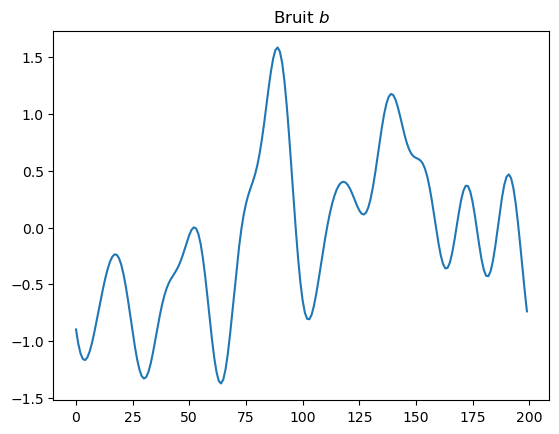

In [48]:
plt.plot(b)
plt.title("Bruit "+r'$b$')
plt.show()

**(b)** Comme le bruit est de basse-fréquence, on se propose de prendre, comme estimation de $u$,

$$\hat{u}_{\lambda}=\underset{x \in \mathcal{B}}{\text{argmin}}\ ||x||_1$$

où $\mathcal{B}$ est l'espace des signaux dont les coefficients de *Fourier* sont identiques à ceux de $d$ à l'exception des $25$ coefficients de plus basse fréquence. Pourquoi l'algorithme de `Douglas_Rachford` est-il bien adapté à ce problème d'optimisation ?

On constate que: 
$$\begin{align}
\hat{u}_{\lambda} &= \underset{x \in \mathcal{B}}{\text{argmin}}\ ||x||_1 \\
& = \underset{x \in R}{\text{argmin}}\ ||x||_1 + \mathcal{I}_{\mathcal{B}}
\end{align}$$

$f_1:x\mapsto ||x||_1$ ainsi que $f_2:x\mapsto \mathcal{I}_{\mathcal{B}}(x)$ étant des fonctions simples dont on peut calculer l'opérateur proximal, l'algorithme de `Douglas_Rachford` est alors bien adapté pour résoudre ce problème d'optimisation.

**(c)** Calculer l'opérateur de projection sur $\mathcal{B}$.

$\mathcal{B}$ est l'espace des signaux dont les coefficients de *Fourier* sont identiques à ceux de $d$ à l'exception des $25$ coefficients de plus basse fréquence, on définit alors `projection_B`.

In [49]:
def projection_B(vect):
    fourier_vect = np.fft.fft2(vect)
    fourier_vect[13:-12] = np.fft.fft2(d)[13:-12]
    vect = np.real(np.fft.ifft2(fourier_vect))
    return vect

**(d)** Construire une estimation de u.

Pour cela, on utilise bien entendu l'algorithme de `Douglas_Rachford` avec $ prox_{f_1}$ étant le `seuillage_doux` et $ prox_{f_2}(x)$ étant la projection sur $\mathcal{B}$, que l'on appelera `Douglas_Rachford_B` en référence à la projection sur $\mathcal{B}$.

In [50]:
def Douglas_Rachford_B(z0,tau,Niter):
    z = z0
    x = z0
    y = z0
    for n in range (Niter):
        x = projection_B(z)
        r = 2*x-z
        y = seuillage_doux(r,tau)
        z = z + y -x
        
    return x

On affiche alors le résultat obtenu:

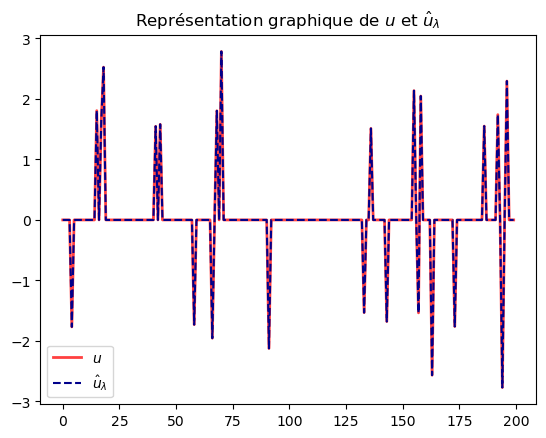

In [51]:
x0=np.zeros((200,1))
tau=1
Niter=1000

plt.title("Représentation graphique de "+r'$u$'+" et "+r'$\hat{u}_{\lambda}$')
plt.plot(u,linewidth=2,alpha=0.75,color="red",label=r'$u$')
plt.plot(Douglas_Rachford_B(x0,tau,Niter),color="darkblue",linestyle="dashed",label=r'$\hat{u}_{\lambda}$')
plt.legend()
plt.show()

<u>Commentaire:</u> Cette fois-ci, l'approximation de $u$ par $\hat{u}_{\lambda}$ est excellente.